# Wind Energy Prediction and Analysis

## Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

### Reading the dataset

In [2]:
data = pd.read_csv("C:\\Users\\hr\\Downloads\\Data-Analytics-with-Python\\Wind-Prediction\\Prediction\\T1.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Data Wrangling

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [5]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

## Visualization

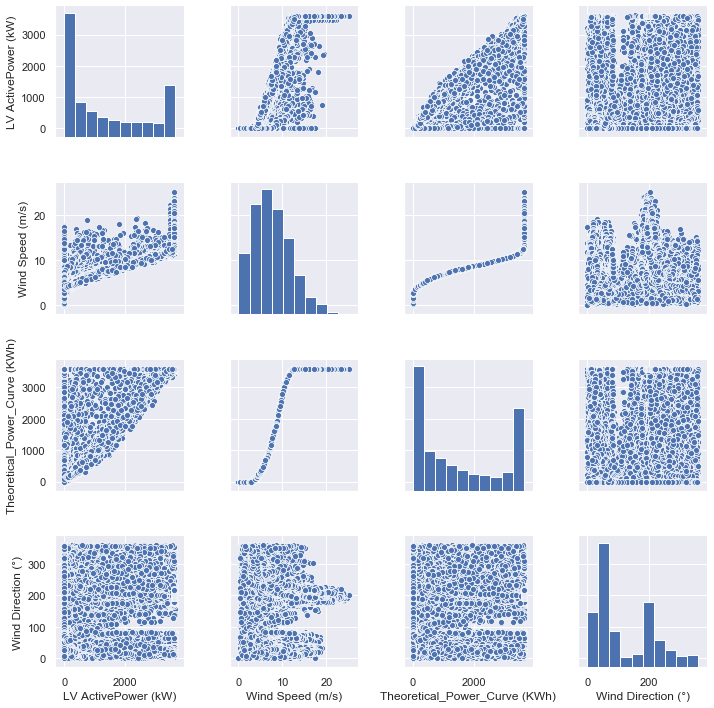

In [6]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

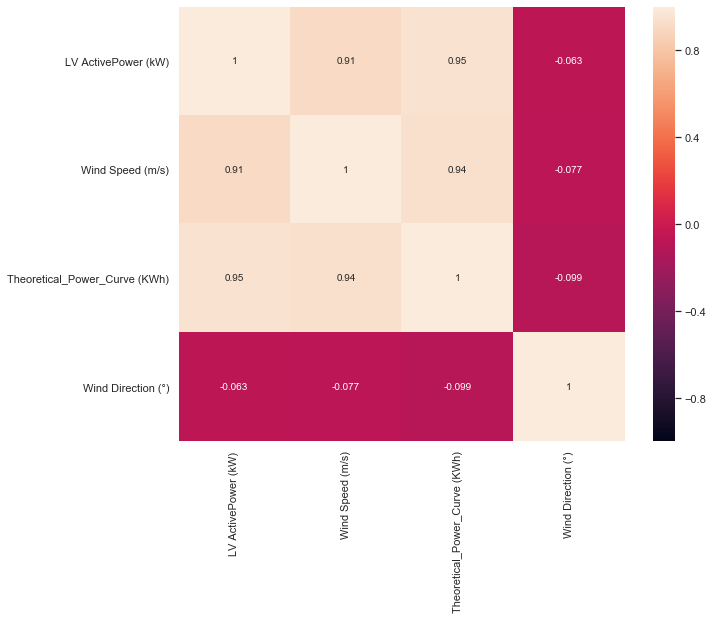

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [7]:
#correlation between the values
corr = data.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [8]:
# Importing a visualization library
! pip install windrose

### Pie Bar Chart (Wind Direction VS Wind Speed)

C:\Users\hr\anaconda_new\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\Users\hr\anaconda_new\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\hr\anaconda_new\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\Users\hr\anaconda_new\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc

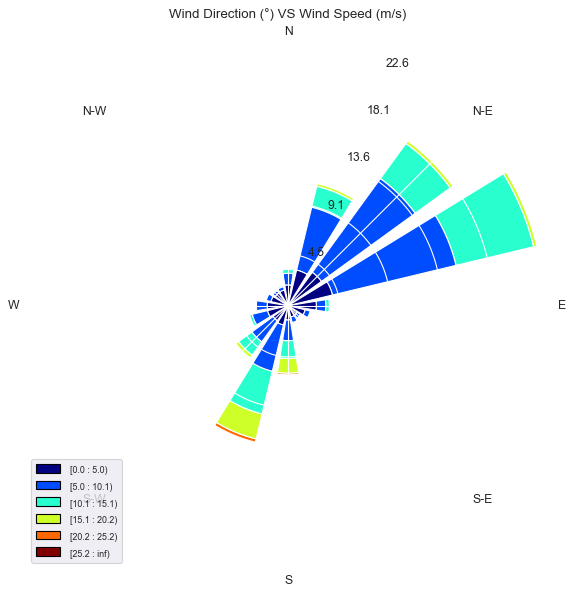

In [9]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

### KDE Plot

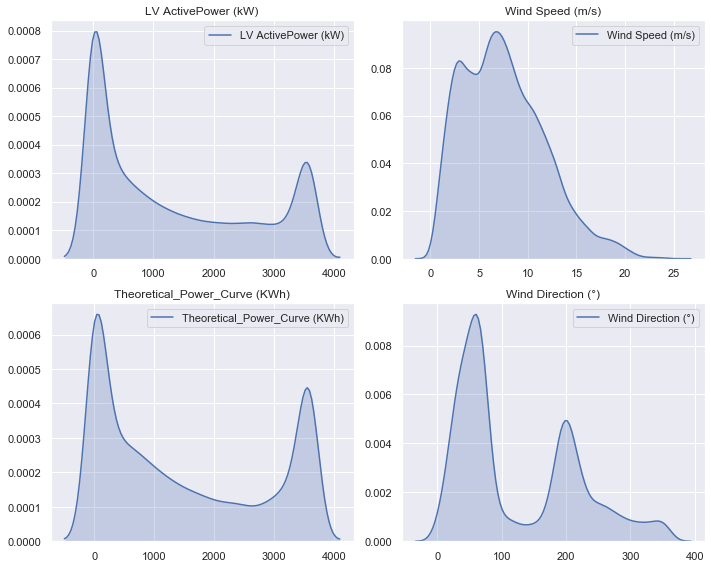

In [10]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [11]:
# droping all the null values from the data
data = data.dropna()

## Converting the Data/Time feature in proper DateTime format

In [12]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


### Line Graph of DateTime VS Target variable

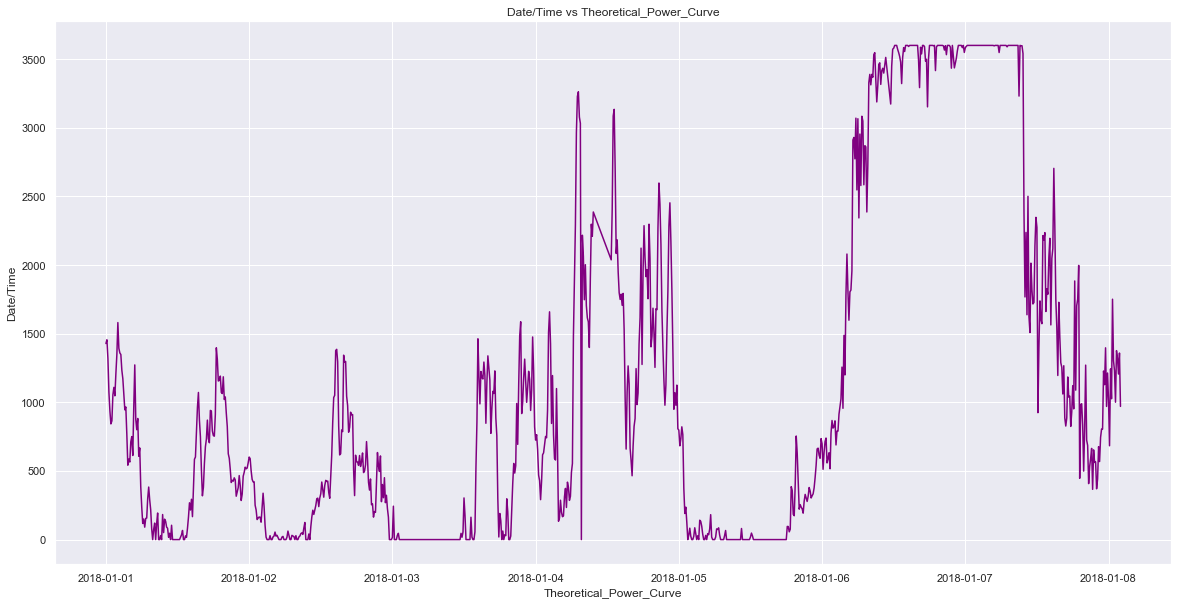

In [16]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][1000:2000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [17]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)"]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972


In [19]:
df = data.copy()

# Building the LSTM model

In [20]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [21]:
# converting the Data/Time as the index for proper shape of the input.
df = df.set_index('Date/Time')

In [22]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 3
neurons_exp = 5
predict_values_exp = 72
lag_exp=24

In [23]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [24]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [25]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [26]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [27]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [28]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [29]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [30]:
'''Drop all the features as we will not be having any in production'''
del df['LV ActivePower (kW)']
del df['Wind Speed (m/s)']
df.head()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-01-01 00:00:00,416.328908
2018-01-01 00:10:00,519.917511
2018-01-01 00:20:00,390.900016
2018-01-01 00:30:00,516.127569
2018-01-01 00:40:00,491.702972


In [31]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh)
Date/Time,
2018-12-31 21:30:00,1811.263260
2018-12-31 21:40:00,1787.100338
2018-12-31 21:50:00,2777.504103
2018-12-31 22:00:00,3025.199012
2018-12-31 22:10:00,3161.693967


In [32]:
# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

In [33]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

In [34]:
# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

In [35]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [36]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

Epoch 1/1
50447/50447 [==============================] - 123s 2ms/step - loss: 0.0057
Epoch 1/1
50447/50447 [==============================] - 119s 2ms/step - loss: 0.0056
Epoch 1/1
50447/50447 [==============================] - 121s 2ms/step - loss: 0.0056


In [37]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    '''# Start Debug prints
    print("X: %", X)
    print("yhat: %", yhat)
    # End Debug prints'''
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Hour=1, Predicted=14.976392, Expected=0.000000
Hour=2, Predicted=-4.981647, Expected=0.000000
Hour=3, Predicted=-3.210572, Expected=0.000000
Hour=4, Predicted=-2.194240, Expected=0.000000
Hour=5, Predicted=-1.537887, Expected=0.000000
Hour=6, Predicted=-1.331838, Expected=0.000000
Hour=7, Predicted=-0.813362, Expected=0.000000
Hour=8, Predicted=-1.434015, Expected=0.000000
Hour=9, Predicted=-0.913353, Expected=0.000000
Hour=10, Predicted=-0.166300, Expected=112.542195
Hour=11, Predicted=111.800842, Expected=19.576482
Hour=12, Predicted=18.878917, Expected=0.000000
Hour=13, Predicted=-0.588260, Expected=0.000000
Hour=14, Predicted=-0.328458, Expected=0.000000
Hour=15, Predicted=-0.833562, Expected=25.725232
Hour=16, Predicted=25.159795, Expected=102.912015
Hour=17, Predicted=102.530407, Expected=16.426896
Hour=18, Predicted=15.999426, Expected=0.000000
Hour=19, Predicted=-0.743984, Expected=0.000000
Hour=20, Predicted=-0.518618, Expected=0.000000
Hour=21, Predicted=-0.150984, Expected=7

In [38]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 5)                    600       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    6         
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


## Calculating Mean Absolute Error

In [41]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Error:  0.46536287545192134


# Final Prediction Plot

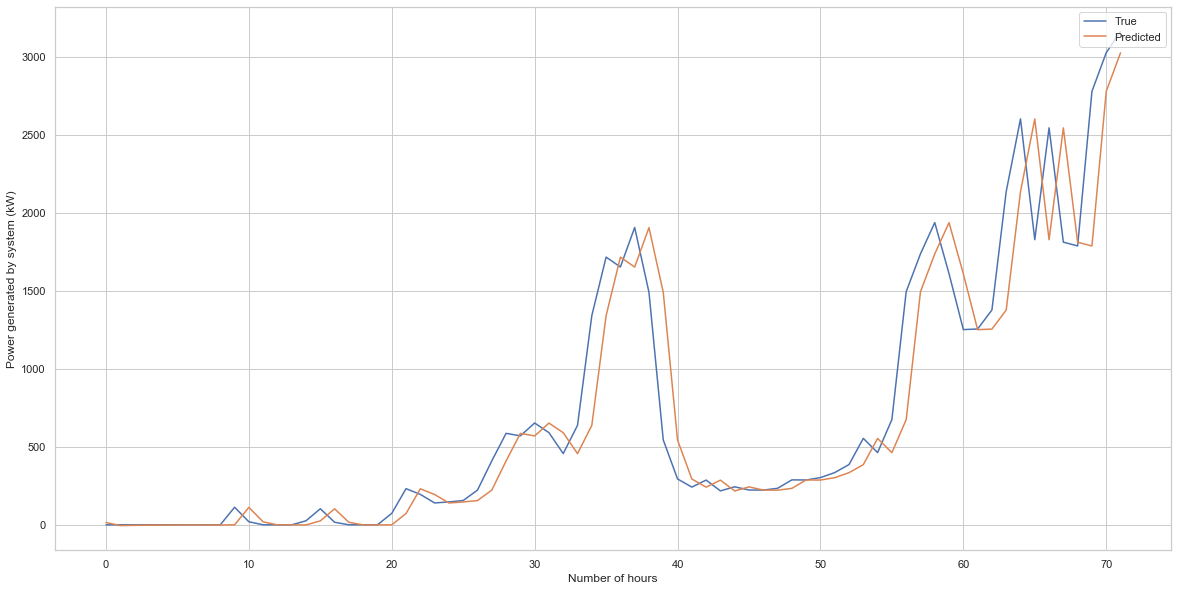

In [42]:
# line plot of observed vs predicted
sns.set_style("whitegrid")
pyplot.figure(figsize=(20,10))
pyplot.plot(expectations_plot[0:100], label="True")
pyplot.plot(predictions_plot[0:100], label="Predicted")
pyplot.legend(loc='upper right')
pyplot.xlabel("Number of hours")
pyplot.ylabel("Power generated by system (kW)")
pyplot.show()